<a href="https://colab.research.google.com/github/AbigailTsani/Portfolio/blob/main/Abigail_Tsani_Darmawan_Streamlining_Bank_Campaign_Promotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Streamlining Bank Campaign Promotion by Applying a Classification to Potential Subscribed Clients

Data powered by: Bank Marketing Campaign of Portuguese Banking

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


## Load Dataset

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

### Input variables:


#### bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
#### related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone') 
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
#### social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric) 
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)


### Output variable (desired target):
21. y: has the client subscribed a term deposit? (binary: 'yes','no')

In [2]:
df = pd.read_csv('/content/Drive/MyDrive/dibimbing/Final Project/bank-additional-full.csv', sep=';')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Every variable have corresponding type according to the description

## Data Cleaning

### Handling Missing Value

In [ ]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

No missing value

Is there an implicit missing value in categorical variable (e.g. unknown, -, or other)

In [ ]:
numerical = df.select_dtypes(include=['int64','float64']).columns.tolist()
categorical = df.select_dtypes(exclude=['int64','float64']).columns.tolist()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

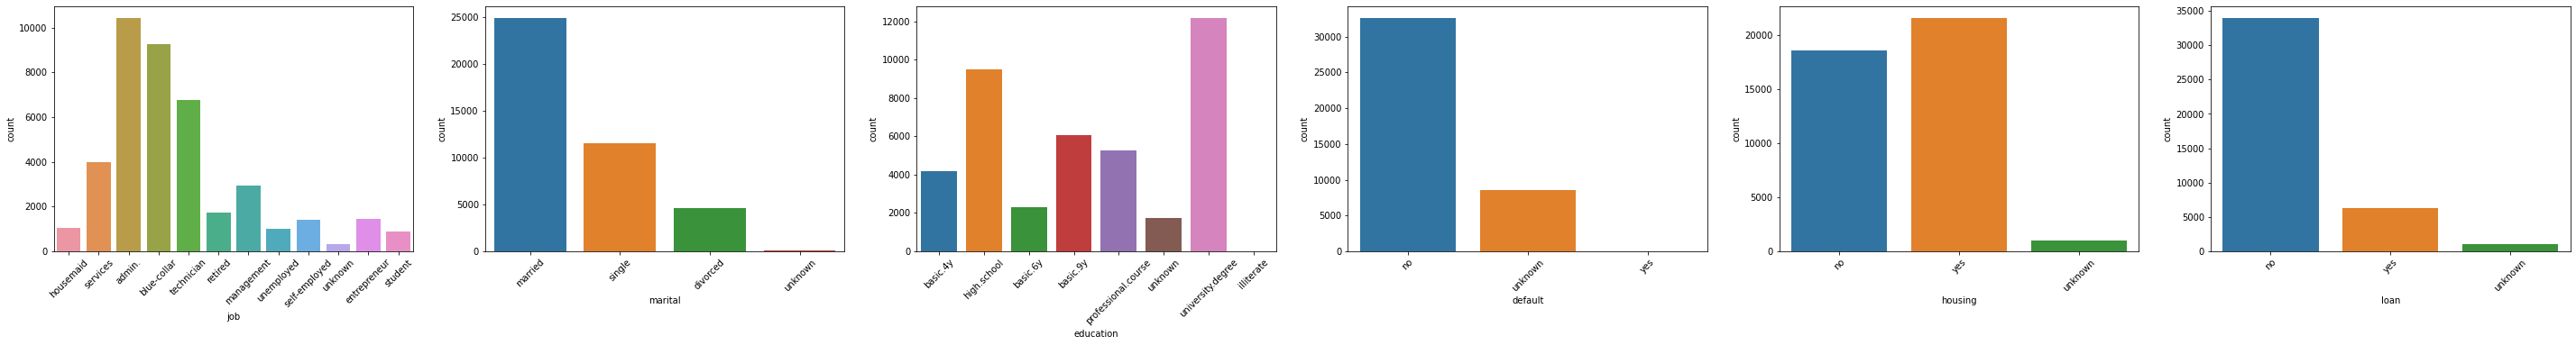

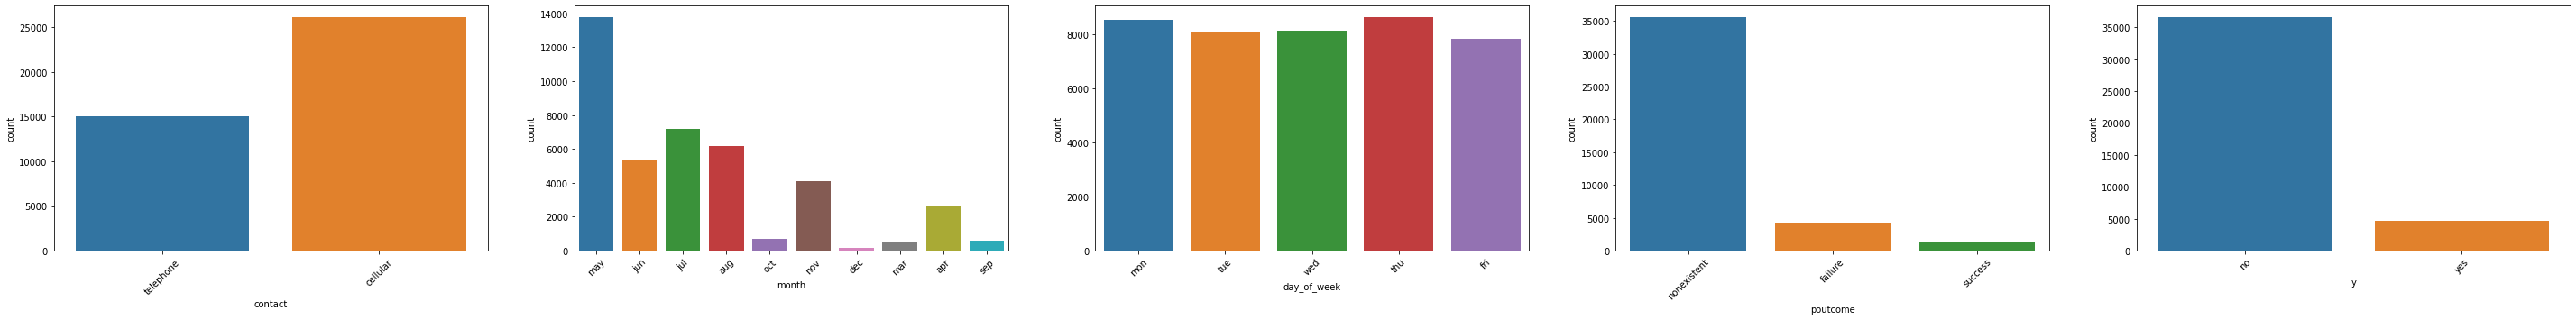

In [ ]:
fig, ax = plt.subplots(1,len(categorical)//2+1, figsize = (50,5))
fig2, ax2 = plt.subplots(1,len(categorical)//2, figsize = (50,5))

for i in range(0, len(categorical)): 
  if i <= len(categorical)//2:
    chart = sns.countplot(df[categorical[i]], ax = ax[i])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
  else:
    chart = sns.countplot(df[categorical[i]], ax = ax2[i-len(categorical)//2-1])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()


There's implicit missing value (unknown) in variable:
1. job
2. marital
3. education
4. default
5. housing
6. loan

So, remove unknown value

In [3]:
df = df.replace('unknown', np.nan)

In [ ]:
df.isna().sum()/df.shape[0]

age               0.000000
job               0.008012
marital           0.001942
education         0.042027
default           0.208726
housing           0.024036
loan              0.024036
contact           0.000000
month             0.000000
day_of_week       0.000000
duration          0.000000
campaign          0.000000
pdays             0.000000
previous          0.000000
poutcome          0.000000
emp.var.rate      0.000000
cons.price.idx    0.000000
cons.conf.idx     0.000000
euribor3m         0.000000
nr.employed       0.000000
y                 0.000000
dtype: float64

Too many missing value on default variable (>5%), so can't be remove and fill missing value with mode

In [4]:
df['default'] = df['default'].fillna('no')

In [ ]:
df.isna().sum()/df.shape[0]

age               0.000000
job               0.008012
marital           0.001942
education         0.042027
default           0.000000
housing           0.024036
loan              0.024036
contact           0.000000
month             0.000000
day_of_week       0.000000
duration          0.000000
campaign          0.000000
pdays             0.000000
previous          0.000000
poutcome          0.000000
emp.var.rate      0.000000
cons.price.idx    0.000000
cons.conf.idx     0.000000
euribor3m         0.000000
nr.employed       0.000000
y                 0.000000
dtype: float64

Now, remove missing value data

In [5]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38245 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38245 non-null  int64  
 1   job             38245 non-null  object 
 2   marital         38245 non-null  object 
 3   education       38245 non-null  object 
 4   default         38245 non-null  object 
 5   housing         38245 non-null  object 
 6   loan            38245 non-null  object 
 7   contact         38245 non-null  object 
 8   month           38245 non-null  object 
 9   day_of_week     38245 non-null  object 
 10  duration        38245 non-null  int64  
 11  campaign        38245 non-null  int64  
 12  pdays           38245 non-null  int64  
 13  previous        38245 non-null  int64  
 14  poutcome        38245 non-null  object 
 15  emp.var.rate    38245 non-null  float64
 16  cons.price.idx  38245 non-null  float64
 17  cons.conf.idx   38245 non-null 

It's now totally clear from missing value

### Handling Duplicate Data 

In [ ]:
df.duplicated().sum()

13

There's 13 duplicate data, so, remove duplicate value

In [6]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

Clear!

### Handling Outlier Data

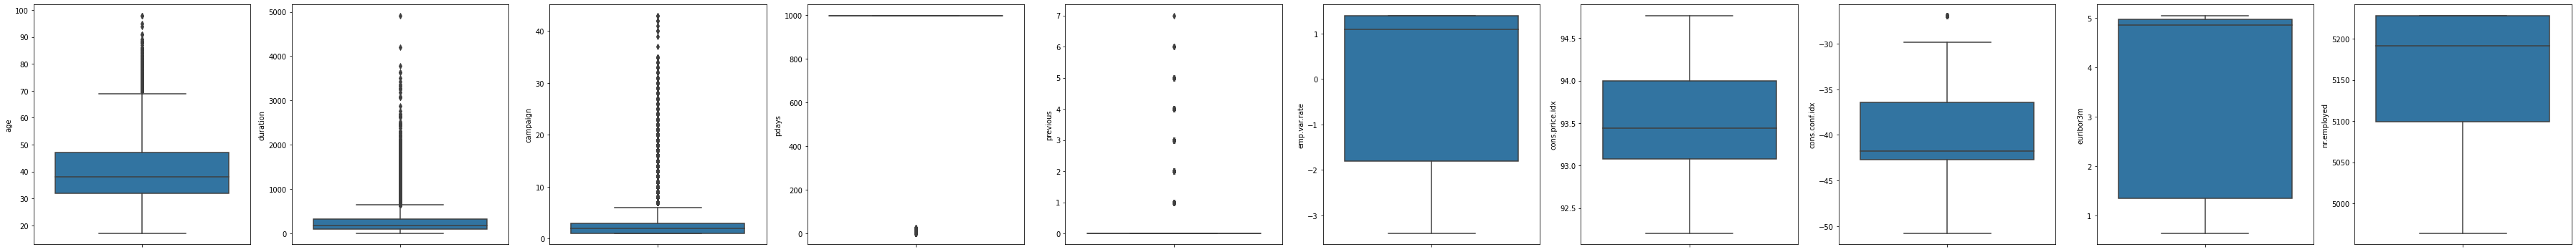

In [ ]:
fig, ax = plt.subplots(1,len(numerical), figsize = (50,5))

for i in range(0, len(numerical)): 
  sns.boxplot(y = df[numerical[i]], ax = ax[i])

plt.tight_layout();
plt.show();

  

There are outlier in variable:
1. age
2. duration
3. campaign
4. pday
5. previous
6. cons.conf.idx

By seeing the number of min or max outlier in every variable, it seems reasonable. Therefore, removing outlier data is not carried out

## Data Splitting

In [7]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=['y'])
y = df['y'].copy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
df_train = pd.concat([x_train, y_train], axis=1)
df_test = pd.concat([x_test, y_test], axis=1)

x_train2 = x_train.copy()
y_train2 = y_train.copy()

## Data Understanding

### Statistical Summary

In [ ]:
df_train[numerical].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,30585.000000,30585.000000,30585.000000,30585.000000,30585.00000,30585.000000,30585.000000,30585.000000,30585.000000,30585.000000
mean,39.880432,257.055060,2.566389,963.447376,0.16992,0.084391,93.571287,-40.540092,3.624170,5167.452320
std,10.311947,258.144637,2.772085,184.506813,0.48560,1.565461,0.576145,4.613655,1.730348,71.855861
min,17.000000,0.000000,1.000000,0.000000,0.00000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.00000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,179.000000,2.000000,999.000000,0.00000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,318.000000,3.000000,999.000000,0.00000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,43.000000,999.000000,7.00000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Based on the data description, by looking at:
1. Min and max value, in every variable is reasonable
2. Mean dan median (50%) value, the distribution of:
- age has roughly positive skewed,
- duration has positive skewed,
- campaign has roughly symmetrical distribution,
- pdays has negative skewed,
- preview has positive skewed,
- emp.var.rate has negative skewed,
- cons.price.idx has roughly symmetrical distribution
- cons.conf.idx has positive skewed,
- euribor3m has negative skewed, and
- nr. employed has roughly symmetrical distribution

In [ ]:
df_train[categorical].describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,30585,30585,30585,30585,30585,30585,30585,30585,30585,30585,30585
unique,11,3,7,2,2,2,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,7977,18510,9426,30583,16482,25793,19583,10235,6406,26438,27219


Based on the table, it is known that:
1. From the 11 type of job, most customers work as admin (7977 of 30585)
2. Most of marital stasus of the customer is married (18510 of 30585)
3. Most of the education of the customer is university degree (9426 of 30585)
4. Most customer didn't have credit in default (30583 of 30585)
5. Most of customer have housing loan (16482 of 30585)
6. Most of customer didn't have personal loan (25793 of 30585)
7. Most of customer use cellular as contact communication type (19583 of 30585)
8. From the 10 months of last contact month of year, many customers were contacted in May (10235 of 30585)
9. From the 5 day of last contact day of the week, many customers were contacted in Thuesday (6406 of 30585)
10. Most customer outcome of the previous marketing campaign is nonexistent (26438 of 30585)
11. Most customer hasn't subscribed a term deposit (27219 of 30585)

### Univariate Analysis

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

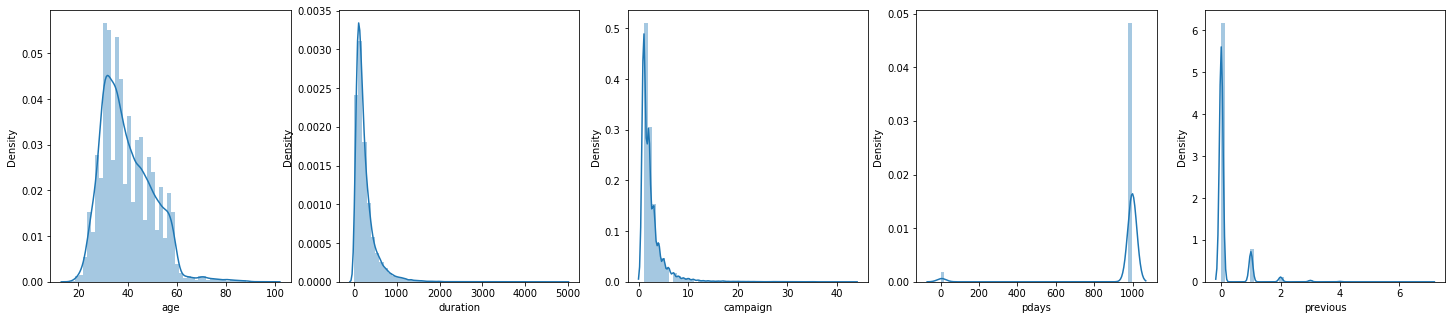

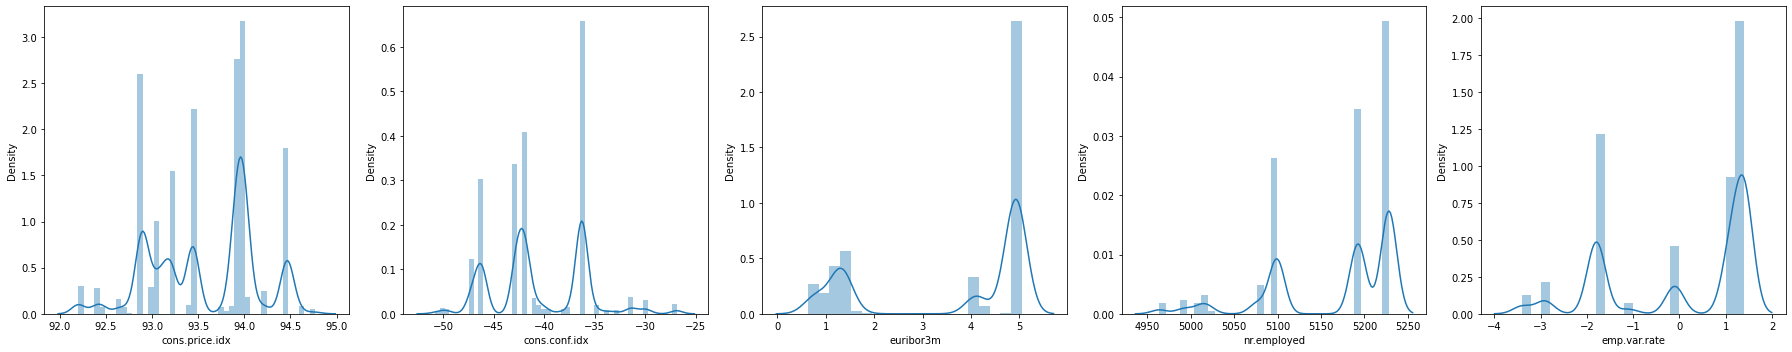

In [ ]:
fig, ax = plt.subplots(1,len(numerical)//2, figsize = (25,5))
fig2, ax2 = plt.subplots(1,len(numerical)//2, figsize = (25,5))

for i in range(0, len(numerical)):
  if i <= len(numerical)//2-1:
    sns.distplot(df_train[numerical[i]], ax = ax[i], axlabel=numerical[i])
  else:
    sns.distplot(df_train[numerical[i]], ax = ax2[i-len(numerical)//2-1], axlabel=numerical[i])
  plt.tight_layout()

plt.show()


Based on the plotting histogram/kde, distribution type is:
1. age: positive skewed
2. duration: positive skewed
3. campaign: positive skewed
4. pday: negative skewed
5. previous: positive skewed
6. emp.var.rate: negative skewed
7. cons.price.idx: negative skewed
8. cons.conf.idx: negative skewed
9. euribor3m: negative skewed
10. nr.employed: negative skewed

Based on the plotting histogram/kde, most of the customer (distribution peak):
1. age: ~ 35
2. duration: ~ 100
3. campaign: ~ 1
4. pday: ~ 999
5. previous: ~ 0
6. emp.var.rate: ~ 1.4
7. cons.price.idx: ~ 94
8. cons.conf.idx: ~ -36.5
9. euribor3m: ~ 5
10. nr.employed: ~ 5225



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

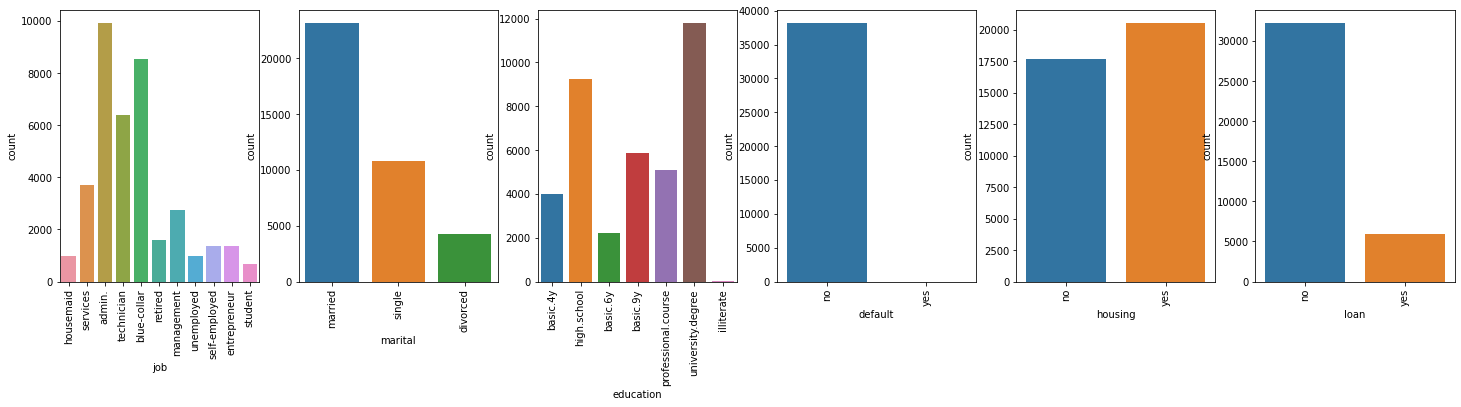

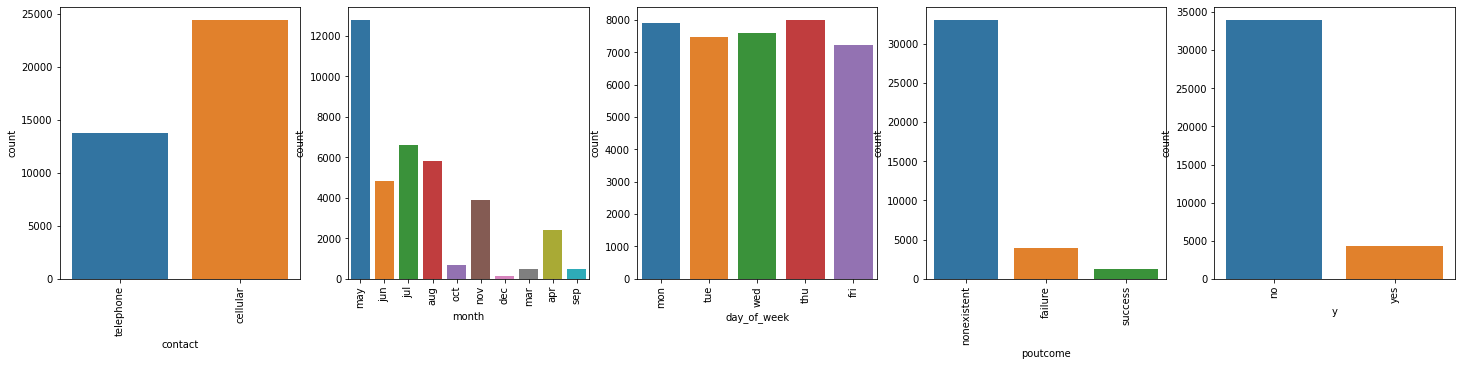

In [ ]:
fig, ax = plt.subplots(1,len(categorical)//2+1, figsize = (25,5))
fig2, ax2 = plt.subplots(1,len(categorical)//2, figsize = (25,5))

for i in range(0, len(categorical)): 
  if i <= len(categorical)//2:
    chart = sns.countplot(df[categorical[i]], ax = ax[i])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
  else:
    chart = sns.countplot(df[categorical[i]], ax = ax2[i-len(categorical)//2-1])
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()


By looking at  bar plot it can seen the difference in number between types of categories in a variable, whether they differ widely or evenly
1. job: admin, blue-collar, and technician is the most types of jobs on the client
2. marital: most of client's marital status is married followed by single, and less divorced
3. education: most of it is university degree followed by high school
4. default: most of client aren't default
5. housing: client with housing and without housing credit aren't significant different
6. loan: most of client have no loan
7. contact: most of client contact via cellular
8. month: may is the most that has the most clients contacted
9. day of week: the number of contacts every day is almost the same
10. poutcome: many of the customers who have not been contacted
11. y: most clients are not subscribed


### Multivariate analysis


Doing encoding so that variables can be computed. Encoding is done in variable which have level in category type and boolean:
1. default
2. housing
3. loan
4. education

In [8]:
boolean = ['default', 'housing', 'loan']

for i in range(0, len(boolean)):
  x_train[boolean[i]] = x_train[boolean[i]].map({'yes': 1, 'no': 0})
  x_test[boolean[i]] = x_test[boolean[i]].map({'yes': 1, 'no': 0})

y_train = y_train.map({'yes': 1, 'no': 0})
y_test = y_test.map({'yes': 1, 'no': 0})

In [9]:
x_train['education'] = x_train['education'].map({'basic.4y':1, 'basic.6y':2, 'basic.9y':3, 'high.school':4, 'illiterate':5, 'professional.course':6, 'university.degree':7})
x_test['education'] = x_test['education'].map({'basic.4y':1, 'basic.6y':2, 'basic.9y':3, 'high.school':4, 'illiterate':5, 'professional.course':6, 'university.degree':7})

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30585 entries, 9845 to 17205
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30585 non-null  int64  
 1   job             30585 non-null  object 
 2   marital         30585 non-null  object 
 3   education       30585 non-null  int64  
 4   default         30585 non-null  int64  
 5   housing         30585 non-null  int64  
 6   loan            30585 non-null  int64  
 7   contact         30585 non-null  object 
 8   month           30585 non-null  object 
 9   day_of_week     30585 non-null  object 
 10  duration        30585 non-null  int64  
 11  campaign        30585 non-null  int64  
 12  pdays           30585 non-null  int64  
 13  previous        30585 non-null  int64  
 14  poutcome        30585 non-null  object 
 15  emp.var.rate    30585 non-null  float64
 16  cons.price.idx  30585 non-null  float64
 17  cons.conf.idx   30585 non-nu

See correlation using pearson's correlation and Heatmap

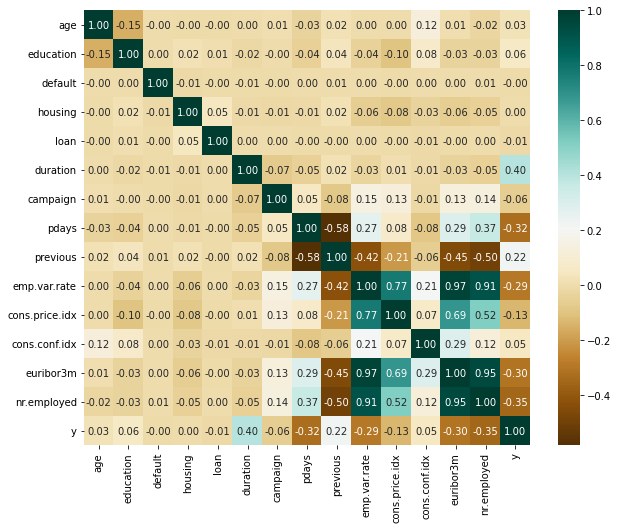

In [ ]:
plt.figure(figsize=(10,8))
df_train = pd.concat([x_train, y_train], axis=1)
correlation = df_train.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='BrBG');

There are high correlation (>0.8) between: 
1. emp.var.rate, euribor3m, and nr.employed also
2. euribor3m and nr.employed

Drop emp.var.rate and euribor3m caused it have weaker relation to target (y)


In [10]:
x_train = x_train.drop(columns=['emp.var.rate', 'euribor3m'], axis=1)
x_test = x_test.drop(columns=['emp.var.rate', 'euribor3m'], axis=1)
x_train2 = x_train2.drop(columns=['emp.var.rate', 'euribor3m'], axis=1)

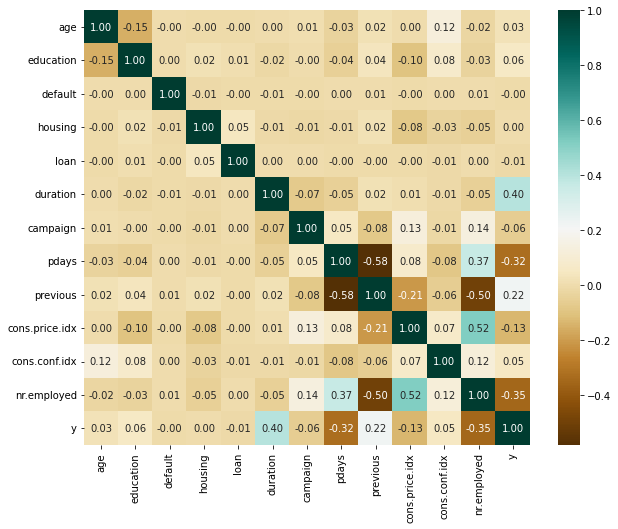

In [ ]:
plt.figure(figsize=(10,8))
df_train = pd.concat([x_train, y_train], axis=1)
correlation = df_train.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='BrBG');

No more predictor variable with high correlation (>0.8)

Based on the Pearson's Corellation, it can be concluded:

(+)
1. cons.price.idx to nr.employed
2. duration to y
3. nr.employed to pdays

(-)
1. pday to previous 
2. previous to nr.employed
3. nr.employed to y
4. pday to y
5. previous to cons.price.idx


## Deep-dive Exploration

### Bank client data

#### Question 1

Does the level of education affect the client to subscribe?
- 'basic.4y':1, 
- 'basic.6y':2, 
- 'basic.9y':3, 
- 'high.school':4, 
- 'illiterate':5, 
- 'professional.course':6, 
- 'university.degree':7

In [ ]:
edu = pd.concat([x_train, y_train], axis= 1).groupby(['education']).agg(
    sub =('y', 'sum'),
    client=('y', 'count')
).reset_index()
edu['%'] = edu['sub']/edu['client']
edu = edu.sort_values('education', ascending=False)
edu


,education,sub,client,%
6,7,1286,9426,0.136431
5,6,462,4139,0.111621
4,5,2,14,0.142857
3,4,821,7428,0.110528
2,3,328,4617,0.071042
1,2,141,1750,0.080571
0,1,326,3211,0.101526


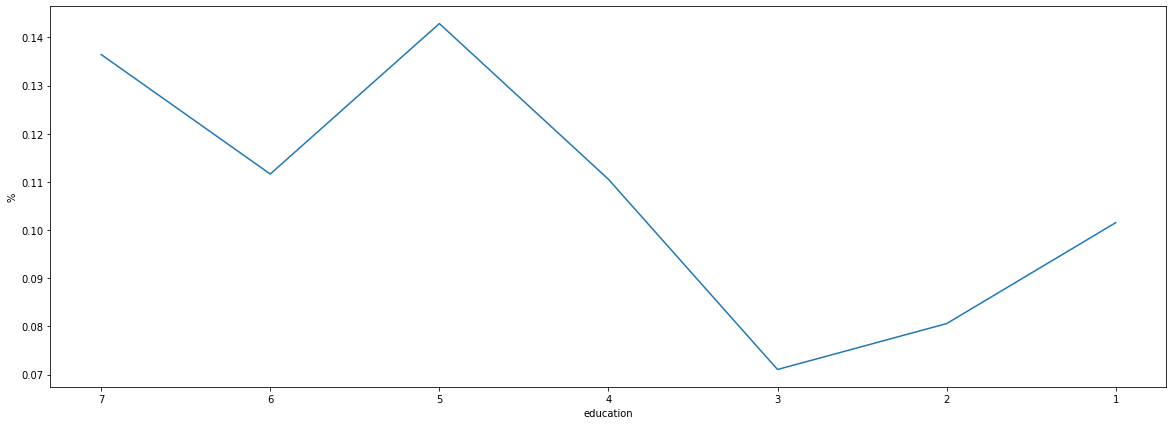

In [ ]:
plt.figure(figsize=(20,7))
sns.lineplot(x=edu['education'].astype(str),
             y=edu['%'], 
             estimator='median')
plt.xticks(rotation=0)
plt.show()

The higher the education, the greater the percentage of subscribers

#### Question 2

Are there certain jobs that subscribe more?

In [ ]:
job = pd.concat([x_train, y_train], axis= 1).groupby(['job']).agg(
    dur=('duration', 'mean'),
    sub =('y', 'sum'),
    client=('y', 'count')
).reset_index()
job['%'] = job['sub']/job['client']
job = job.sort_values('%', ascending=False)
job

,job,dur,sub,client,%
8,student,277.152727,174,550,0.316364
5,retired,272.017544,300,1254,0.239234
10,unemployed,250.972798,107,772,0.138601
0,admin.,252.841670,1012,7977,0.126865
6,self-employed,258.750233,121,1073,0.112768
4,management,253.947536,245,2192,0.111770
9,technician,250.085798,547,5105,0.107150
3,housemaid,246.442911,73,797,0.091593
2,entrepreneur,261.278552,92,1077,0.085422
7,services,256.831997,232,2994,0.077488


The percentage of clients who subscribe as students has the highest percentage compared to other jobs, followed by retired, unemployed, and other jobs.

#### Question 3

Does age affect the client to subscribe?

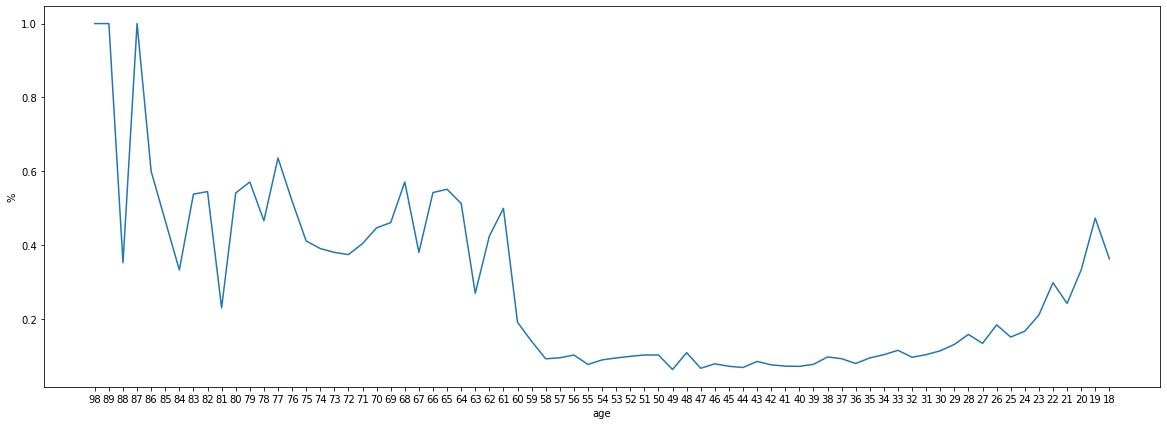

In [ ]:
age = pd.concat([x_train, y_train], axis= 1).groupby(['age']).agg(
    dur=('duration', 'mean'),
    sub =('y', 'sum'),
    client=('y', 'count')
).reset_index()
age['%'] = age['sub']/age['client']
age = age.sort_values('age', ascending=False)
age = age[age['%']>0]

plt.figure(figsize=(20,7))
sns.lineplot(x=age['age'].astype(str),
             y=age['%'], 
             estimator='median')
plt.xticks(rotation=0)
plt.show()

Clients who have the potential to subscribe are at the age of 20 and continue to decrease as they get older and will rise again at the age of 60 and continue to increase as they get older

#### Question 4

Does marital status affect the client's want to subscribe?

In [ ]:
marital = pd.concat([x_train, y_train], axis= 1).groupby(['marital']).agg(
    sub =('y', 'sum'),
    client=('y', 'count')
).reset_index()
marital['%'] = marital['sub']/marital['client']
marital = marital.sort_values('%', ascending=False)
marital

,marital,sub,client,%
2,single,1185,8618,0.137503
0,divorced,364,3457,0.105294
1,married,1817,18510,0.098163


The percentage of clients who subscribe is almost the same for each type of merital

#### Question 5

Does ownership of installment credit affect clients to subscribe?

In [ ]:
credit = pd.concat([x_train, y_train], axis= 1).groupby(['default', 'housing', 'loan']).agg(
    sub =('y', 'sum'),
    client=('y', 'count')
).reset_index()
credit['%'] = credit['sub']/credit['client']
credit = credit.sort_values('%', ascending=False)
credit

,default,housing,loan,sub,client,%
2,0,1,0,1547,13633,0.113475
1,0,0,1,213,1943,0.109624
0,0,0,0,1317,12158,0.108324
3,0,1,1,289,2849,0.101439
4,1,0,0,0,2,0.000000


### Related with the last contact of the current campaign

#### Question 1

Does the contact communication type affect  the client wants to subscribe?

In [ ]:
contact = pd.concat([x_train, y_train], axis= 1).groupby(['contact']).agg(
    dur=('duration', 'mean'),
    sub =('y', 'sum'),
    client=('y', 'count')
).reset_index()
contact['%'] = contact['sub']/contact['client']
contact = contact.sort_values('%', ascending=False)
contact

,contact,dur,sub,client,%
0,cellular,261.863606,2815,19583,0.143747
1,telephone,248.496092,551,11002,0.050082


Based on the aggregation value, the number of clients contacted by cellular is greater than by telephone. Based on duration, the average contact time is relatively the same. Based on the percentage value, the number of subscribed clients is 3x more by cellular than by telephone

#### Question 2

Does the duration of communication affect the client subscribe?

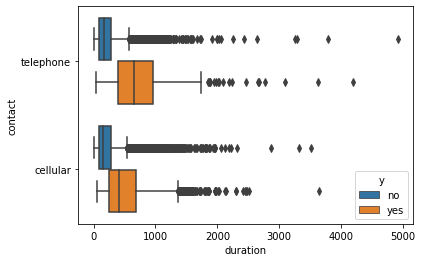

In [ ]:
sns.boxplot(data = pd.concat([x_train2, y_train2], axis= 1), x = 'duration', y = 'contact', hue = 'y')

By looking at the duration value at telephone or cellular, both of which have a higher duration on clients who are subscribed compared to those who are not

#### Question 3 

Does it affect the client on a certain day in contact to subscribe?

In [ ]:
day_data = (pd.concat([x_train, y_train], axis= 1).groupby('day_of_week').agg( 
    sub =('y', 'sum'),
    client=('y', 'count')
).reset_index())
day_data['%'] = day_data['sub']/day_data['client']
day_data['no'] = day_data['day_of_week'].map({'mon': 1, 'tue': 2, 'wed':3, 'thu':4, 'fri':5, 'sat':6, 'sun':7})
day_data = day_data.sort_values(by=['no'])
day_data


,day_of_week,sub,client,%,no
1,mon,627,6370,0.098430,1
3,tue,690,5964,0.115694,2
4,wed,660,6092,0.108339,3
2,thu,772,6406,0.120512,4
0,fri,617,5753,0.107248,5


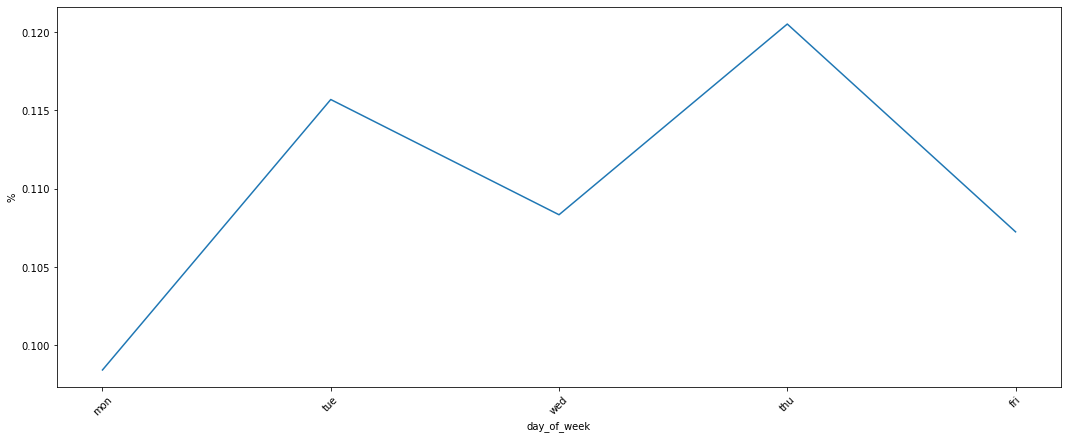

In [ ]:
plt.figure(figsize=(18,7))
sns.lineplot(x=day_data['day_of_week'].astype(str),
             y=day_data['%'], 
             estimator='median')
plt.xticks(rotation=45)
plt.show()

There is no specific day that shows the client is more willing to subscribe

#### Question 4

Does it affect the client on a certain month in contact to subscribe?

In [ ]:
month_data = (pd.concat([x_train, y_train], axis= 1)
            .groupby('month')
            .agg(
                sub =('y', 'sum'),
                client=('y', 'count'))
            .reset_index())
month_data['%'] = month_data['sub']/month_data['client']
month_data['no'] = month_data['month'].map({'jan': 1, 'feb': 2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep': 9, 'oct':10, 'nov':11, 'dec':12})
month_data = month_data.sort_values(by=['no'])
month_data


,month,sub,client,%,no
5,mar,197,379,0.519789,3
0,apr,392,1929,0.203214,4
6,may,653,10235,0.063801,5
4,jun,393,3893,0.100950,6
3,jul,483,5300,0.091132,7
1,aug,462,4668,0.098972,8
9,sep,179,400,0.447500,9
8,oct,228,510,0.447059,10
7,nov,319,3141,0.101560,11
2,dec,60,130,0.461538,12


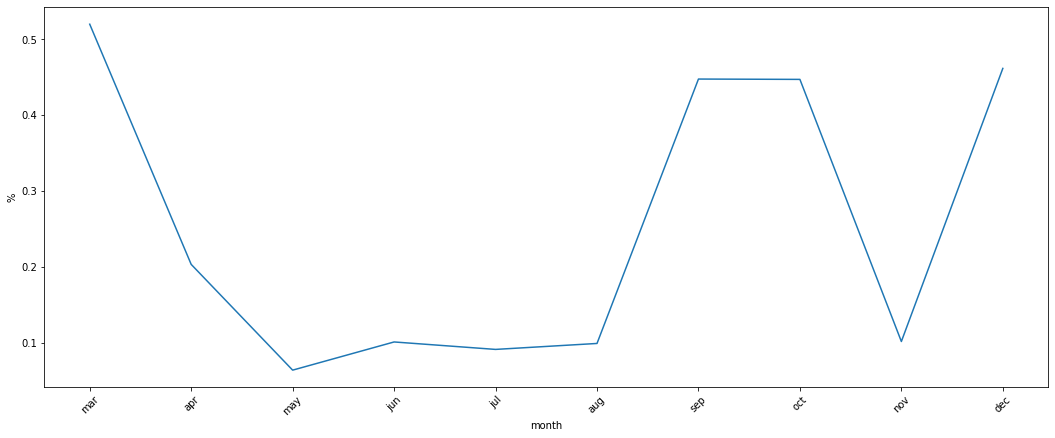

In [ ]:
plt.figure(figsize=(18,7))
sns.lineplot(x=month_data['month'].astype(str),
             y=month_data['%'], 
             estimator='median')
plt.xticks(rotation=45)
plt.show()

There is no contact customer data in January and February. The percentage is quite high in March, August, September, October and December, then the other month

### Other attributes

#### Question 1

Does the more clients in contact the more willing to subscribe?

In [ ]:
campaign = (pd.concat([x_train, y_train], axis= 1)
            .groupby('campaign')
            .agg(
                sub =('y', 'sum'),
                client=('y', 'count'))
            .reset_index())
campaign['%'] = campaign['sub']/campaign['client']
campaign = campaign.sort_values(by=['campaign'])
campaign

,campaign,sub,client,%
0,1,1627,13116,0.124047
1,2,888,7854,0.113063
2,3,427,3937,0.108458
3,4,189,1976,0.095648
4,5,93,1193,0.077955
5,6,57,737,0.077341
6,7,31,466,0.066524
7,8,14,296,0.047297
8,9,13,203,0.064039
9,10,9,172,0.052326


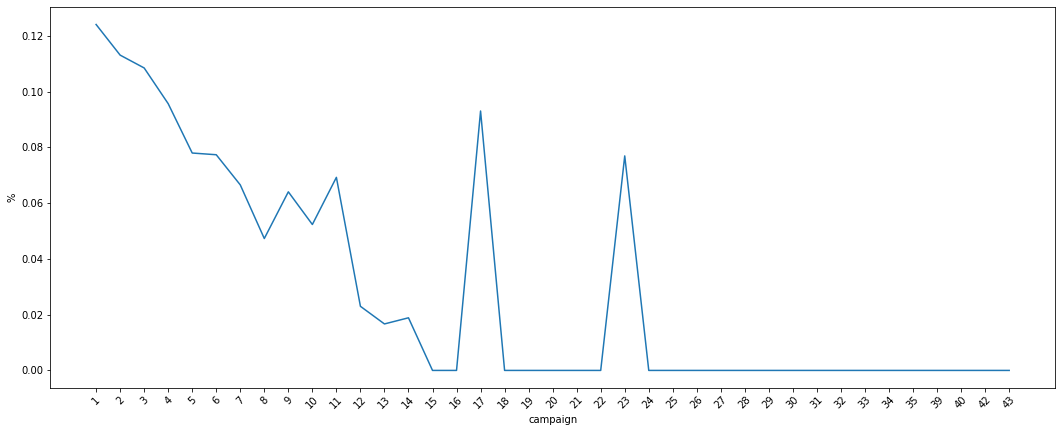

In [ ]:
plt.figure(figsize=(18,7))
sns.lineplot(x=campaign['campaign'].astype(str),
             y=campaign['%'], 
             estimator='median')
plt.xticks(rotation=45)
plt.show()

The more frequently contacted, the smaller the subsribe percentage

#### Question 2

Will the number of days that passed after the client was last contacted from the previous campaign influenced the client to want to subscribe?

In [ ]:
x_train[x_train['pdays']==999].shape[0]/x_train.shape[0]

0.9641981363413438

96.42% clients have not been contacted

In [ ]:
contacted = df_train[x_train['pdays']!=999]
no_contacted = df_train[x_train['pdays']==999]

In [ ]:
contacted[contacted['y']=='yes'].shape[0]/contacted.shape[0]

0.6365296803652968

In [ ]:
no_contacted[no_contacted['y']=='yes'].shape[0]/no_contacted.shape[0]

0.09050525601898948

63.65% of clients who are contacted subscribe, if the client is not contacted 9.05% of clients subscribe

#### Question 3

Will contacting before the campaign will make the client more willing to subscribe?

In [ ]:
previous = pd.concat([x_train, y_train], axis= 1).groupby(['previous']).agg(
    sub =('y', 'sum'),
    client=('y', 'count')
).reset_index()
previous['%'] = previous['sub']/previous['client']
previous = previous.sort_values('previous', ascending=True)
previous

,previous,sub,client,%
0,0,2299,26438,0.086958
1,1,688,3392,0.202830
2,2,253,537,0.471136
3,3,95,161,0.590062
4,4,22,43,0.511628
5,5,7,9,0.777778
6,6,2,4,0.500000
7,7,0,1,0.000000


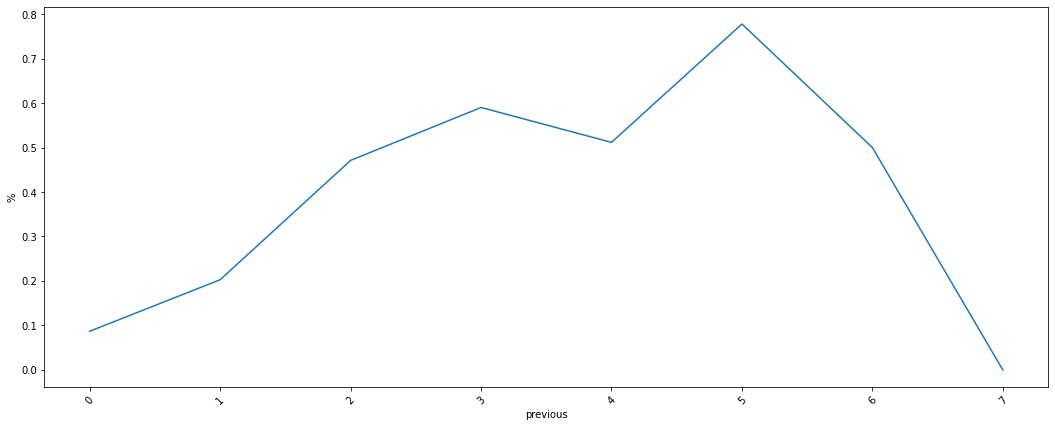

In [ ]:
plt.figure(figsize=(18,7))
sns.lineplot(x=previous['previous'].astype(str),
             y=previous['%'], 
             estimator='median')
plt.xticks(rotation=45)
plt.show()

Based on the data they have, the clients who are contacted the further away from the campaign time, the fewer the number but the higher the percentage

#### Question 4

Will clients who previously subscribed to the previous campaign subscribe to the next campaign?

In [ ]:
pout = pd.concat([x_train, y_train], axis= 1).groupby(['poutcome']).agg(
    sub =('y', 'sum'),
    client=('y', 'count')
).reset_index()
pout['%'] = pout['sub']/pout['client']
pout = pout.sort_values('poutcome', ascending=True)
pout

,poutcome,sub,client,%
0,failure,420,3149,0.133376
1,nonexistent,2299,26438,0.086958
2,success,647,998,0.648297


64.83% of people who have subscribed to the previous campaign will subscribe to the next campaign. 13.33% who didn't subscribe to the previous campaign will subscribe. This value is higher than the percentage of people who have never been contacted by a subscribed campaign

### Social and economic context attributes

#### Question 1

Does the consumer price index value affect the client to subscribe?

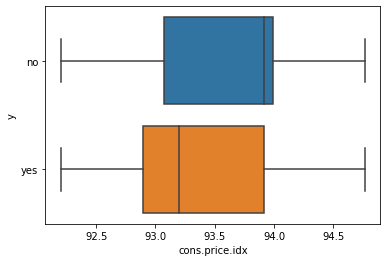

In [ ]:
sns.boxplot(data = pd.concat([x_train2, y_train2], axis= 1), x = 'cons.price.idx', y='y')

There is difference in the value of median of the consumer price index value for clients who are subscribed and who are not

#### Question 2

Does the consumer confidence index value affect the client to subscribe?

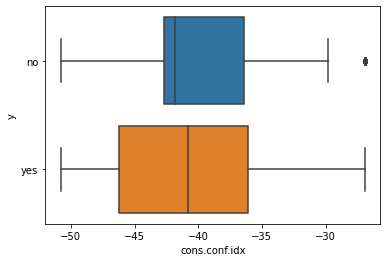

In [ ]:
sns.boxplot(data = pd.concat([x_train2, y_train2], axis= 1), x = 'cons.conf.idx', y='y')

The smaller the consumer confidence index value, the more subscribers

#### Question 3

Does the number of employees value affect the client to subscribe?

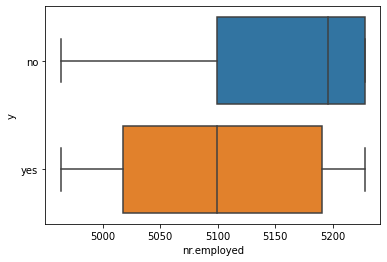

In [ ]:
sns.boxplot(data = pd.concat([x_train2, y_train2], axis= 1), x = 'nr.employed', y='y')

The smaller the consumer confidence index value, the more subscribers

## Preprocessing

### Feature Engineering

In [11]:
ordinal = x_train.select_dtypes(include=['object']).columns.tolist()

In [12]:
for i in ordinal:
  one_hot = []
  one_hot = pd.get_dummies(x_train[i], prefix=i);
  x_train = pd.concat([x_train, one_hot], axis=1)
  x_train = x_train.drop(i, axis=1)

for i in ordinal:
  one_hot = []
  one_hot = pd.get_dummies(x_test[i], prefix=i);
  x_test = pd.concat([x_test, one_hot], axis=1)
  x_test = x_test.drop(i, axis=1)

## Modelling (Imbalance Data)

In [ ]:
y_train.value_counts()

0    27219
1     3366
Name: y, dtype: int64

Use classification model because it data have a target (churn). There are several model will used:
1. K-Nearest Neighbor
2. Logistic Regression
3. Decision Tree
4. Random Forest
5. Support Vector Machine

Matric Evaluation used is recall. This metric was chosen because it wants to capture as many customers as possible who potentially subscribed a term deposit. 

In [13]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

def train(model, hp, x_train, y_train, x_test, y_test):
  # Modelling
  model_gridcv = GridSearchCV(model, hp, cv=5, scoring='recall')
  model_gridcv.fit(x_train, y_train)

  cv_result = pd.DataFrame(model_gridcv.cv_results_)
  retain_cols = ['params','mean_test_score', 'rank_test_score']
  cv_result2 = cv_result[retain_cols].sort_values('rank_test_score')
  print(cv_result2.drop('rank_test_score', axis = 1))

  # Evaluation
  fig, ax = plt.subplots(figsize=(10,7))
  y_pred = model_gridcv.best_estimator_.predict(x_test)

  cm = confusion_matrix(y_test, y_pred, labels=model_gridcv.best_estimator_.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model_gridcv.best_estimator_.classes_)
  disp.plot(ax=ax)
  plt.show()

  y_pred = model_gridcv.best_estimator_.predict(x_test)
  print(classification_report(y_test, y_pred))  

### K-Nearest Neighbor

                                       params  mean_test_score
1   {'n_neighbors': 2, 'weights': 'distance'}         0.483955
5   {'n_neighbors': 4, 'weights': 'distance'}         0.483063
2    {'n_neighbors': 3, 'weights': 'uniform'}         0.482766
9   {'n_neighbors': 6, 'weights': 'distance'}         0.481875
3   {'n_neighbors': 3, 'weights': 'distance'}         0.481579
13  {'n_neighbors': 8, 'weights': 'distance'}         0.481578
6    {'n_neighbors': 5, 'weights': 'uniform'}         0.480981
11  {'n_neighbors': 7, 'weights': 'distance'}         0.478904
10   {'n_neighbors': 7, 'weights': 'uniform'}         0.478012
7   {'n_neighbors': 5, 'weights': 'distance'}         0.472367
12   {'n_neighbors': 8, 'weights': 'uniform'}         0.405820
8    {'n_neighbors': 6, 'weights': 'uniform'}         0.385020
4    {'n_neighbors': 4, 'weights': 'uniform'}         0.350860
0    {'n_neighbors': 2, 'weights': 'uniform'}         0.289362


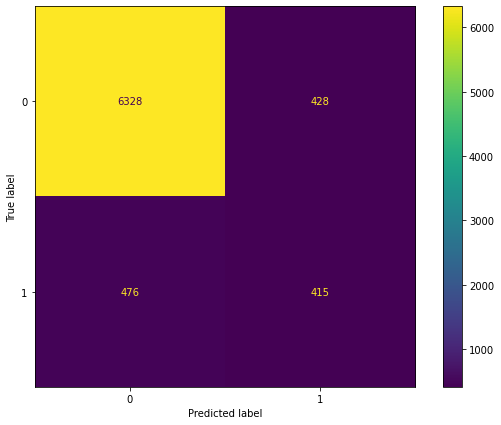

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      6756
           1       0.49      0.47      0.48       891

    accuracy                           0.88      7647
   macro avg       0.71      0.70      0.71      7647
weighted avg       0.88      0.88      0.88      7647



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn_parameters = {
    'n_neighbors': (2,3,4,5,6,7,8),
    'weights':('uniform','distance')
}

train(knn, knn_parameters, x_train, y_train, x_test, y_test)

Best Hyperparameter for K-NN is n = 2, weight = distance. 

The model created using KNN is not good, because it can only capture 47% of customer has subscribed a term deposit

### Logistic Regression

/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

                                        params  mean_test_score
32             {'C': 1, 'solver': 'newton-cg'}         0.406412
26           {'C': 0.1, 'solver': 'newton-cg'}         0.405224
38            {'C': 10, 'solver': 'newton-cg'}         0.404927
20          {'C': 0.01, 'solver': 'newton-cg'}         0.396608
31             {'C': 1, 'solver': 'liblinear'}         0.395418
25           {'C': 0.1, 'solver': 'liblinear'}         0.392743
37            {'C': 10, 'solver': 'liblinear'}         0.390071
14         {'C': 0.001, 'solver': 'newton-cg'}         0.387991
19          {'C': 0.01, 'solver': 'liblinear'}         0.387396
8         {'C': 0.0001, 'solver': 'newton-cg'}         0.377001
24               {'C': 0.1, 'solver': 'lbfgs'}         0.374023
36                {'C': 10, 'solver': 'lbfgs'}         0.371359
2          {'C': 1e-05, 'solver': 'newton-cg'}         0.369277
30                 {'C': 1, 'solver': 'lbfgs'}         0.366613
18              {'C': 0.01, 'solver': 'l

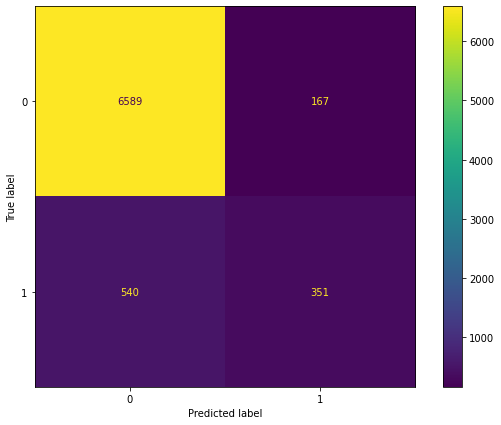

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      6756
           1       0.68      0.39      0.50       891

    accuracy                           0.91      7647
   macro avg       0.80      0.68      0.72      7647
weighted avg       0.90      0.91      0.90      7647



In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)

lr_parameters = {
    'C' : (0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10),
    'solver': ('lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga')
}

train(lr, lr_parameters, x_train, y_train, x_test, y_test)

Best Hyperparameter for Logistic Regression is C: 1, solver: newton-cg. 

The model created using Logistic Regression is not good, because it can only capture 39% of customer has subscribed a term deposit

### Decision Tree

              params  mean_test_score
2   {'max_depth': 3}         0.586448
8   {'max_depth': 9}         0.540993
6   {'max_depth': 7}         0.525553
5   {'max_depth': 6}         0.524957
7   {'max_depth': 8}         0.524663
3   {'max_depth': 4}         0.502370
9  {'max_depth': 10}         0.486931
4   {'max_depth': 5}         0.480981
1   {'max_depth': 2}         0.409983
0   {'max_depth': 1}         0.000000


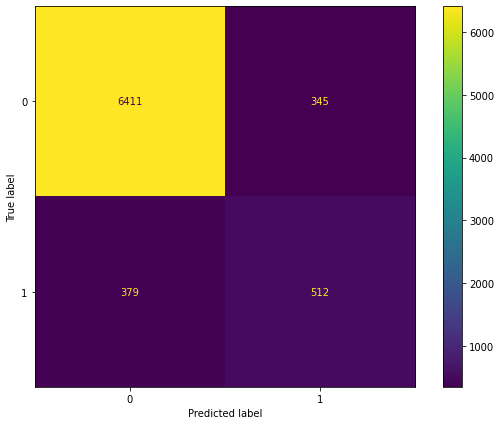

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      6756
           1       0.60      0.57      0.59       891

    accuracy                           0.91      7647
   macro avg       0.77      0.76      0.77      7647
weighted avg       0.90      0.91      0.90      7647



In [ ]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(random_state=42)

dt_parameters = {
    'max_depth':(1,2,3,4,5, 6, 7, 8, 9, 10)
}

train(dt, dt_parameters, x_train, y_train, x_test, y_test)

Best Hyperparameter for Decision Tree is max_depth = 3. 

The model created using Decision Tree is not really good, because it can only capture 57% of customer has subscribed a term deposit

### Random forest

                                  params  mean_test_score
72   {'max_depth': 9, 'n_estimators': 2}         0.350557
81  {'max_depth': 10, 'n_estimators': 2}         0.344928
54   {'max_depth': 7, 'n_estimators': 2}         0.330961
63   {'max_depth': 8, 'n_estimators': 2}         0.323248
82  {'max_depth': 10, 'n_estimators': 5}         0.305705
..                                   ...              ...
3   {'max_depth': 1, 'n_estimators': 20}         0.000000
2   {'max_depth': 1, 'n_estimators': 10}         0.000000
1    {'max_depth': 1, 'n_estimators': 5}         0.000000
8   {'max_depth': 1, 'n_estimators': 70}         0.000000
0    {'max_depth': 1, 'n_estimators': 2}         0.000000

[90 rows x 2 columns]


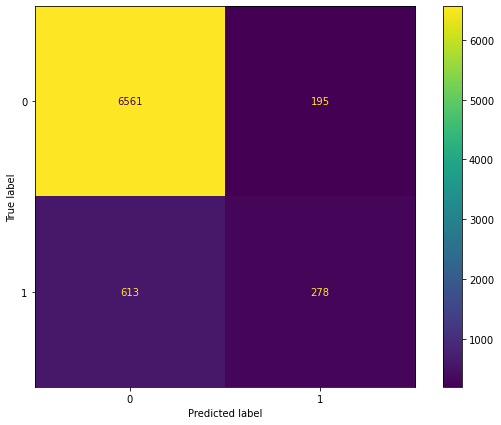

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6756
           1       0.59      0.31      0.41       891

    accuracy                           0.89      7647
   macro avg       0.75      0.64      0.67      7647
weighted avg       0.88      0.89      0.88      7647



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf_parameters = {
    'n_estimators': (2, 5, 10, 20,30,40,50, 60, 70),
    'max_depth':(1,2,3,4,5, 6, 7, 8, 9, 10)
}

train(rf, rf_parameters, x_train, y_train, x_test, y_test)

Best Hyperparameter for Random Forest is max_depth = 9, n_estimators = 2

The model created using Random Forest is not good, because it can only capture 31% of customer has subscribed a term deposit

## Modelling (Undersampling)

In [14]:
from imblearn import under_sampling

x_under, y_under = under_sampling.RandomUnderSampler().fit_resample(x_train, y_train)

In [ ]:
y_under.value_counts()

0    3366
1    3366
Name: y, dtype: int64

### K-Nearest Neighbor

                                       params  mean_test_score
13  {'n_neighbors': 8, 'weights': 'distance'}         0.885918
10   {'n_neighbors': 7, 'weights': 'uniform'}         0.885619
6    {'n_neighbors': 5, 'weights': 'uniform'}         0.883839
9   {'n_neighbors': 6, 'weights': 'distance'}         0.883837
11  {'n_neighbors': 7, 'weights': 'distance'}         0.883241
7   {'n_neighbors': 5, 'weights': 'distance'}         0.881758
5   {'n_neighbors': 4, 'weights': 'distance'}         0.868983
2    {'n_neighbors': 3, 'weights': 'uniform'}         0.868390
3   {'n_neighbors': 3, 'weights': 'distance'}         0.863339
12   {'n_neighbors': 8, 'weights': 'uniform'}         0.863338
8    {'n_neighbors': 6, 'weights': 'uniform'}         0.849376
1   {'n_neighbors': 2, 'weights': 'distance'}         0.822334
4    {'n_neighbors': 4, 'weights': 'uniform'}         0.808675
0    {'n_neighbors': 2, 'weights': 'uniform'}         0.720432


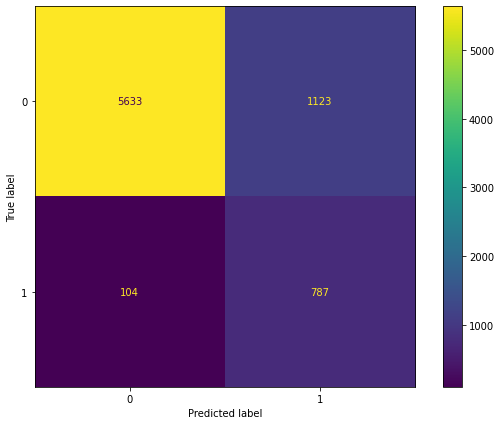

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      6756
           1       0.41      0.88      0.56       891

    accuracy                           0.84      7647
   macro avg       0.70      0.86      0.73      7647
weighted avg       0.92      0.84      0.86      7647



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn_parameters = {
    'n_neighbors': (2,3,4,5,6,7,8),
    'weights':('uniform','distance')
}

train(knn, knn_parameters, x_under, y_under, x_test, y_test)

Best Hyperparameter for K-NN is n = 8, weight = distance. 

The model created using KNN is good, because it can only capture 88% of customer has subscribed a term deposit

### Logistic Regression

/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


                                        params  mean_test_score
26           {'C': 0.1, 'solver': 'newton-cg'}         0.887698
38            {'C': 10, 'solver': 'newton-cg'}         0.882946
32             {'C': 1, 'solver': 'newton-cg'}         0.882945
20          {'C': 0.01, 'solver': 'newton-cg'}         0.875518
31             {'C': 1, 'solver': 'liblinear'}         0.859477
37            {'C': 10, 'solver': 'liblinear'}         0.858884
25           {'C': 0.1, 'solver': 'liblinear'}         0.857696
14         {'C': 0.001, 'solver': 'newton-cg'}         0.845217
19          {'C': 0.01, 'solver': 'liblinear'}         0.842249
2          {'C': 1e-05, 'solver': 'newton-cg'}         0.837193
8         {'C': 0.0001, 'solver': 'newton-cg'}         0.835708
36                {'C': 10, 'solver': 'lbfgs'}         0.822342
30                 {'C': 1, 'solver': 'lbfgs'}         0.821448
24               {'C': 0.1, 'solver': 'lbfgs'}         0.821156
18              {'C': 0.01, 'solver': 'l

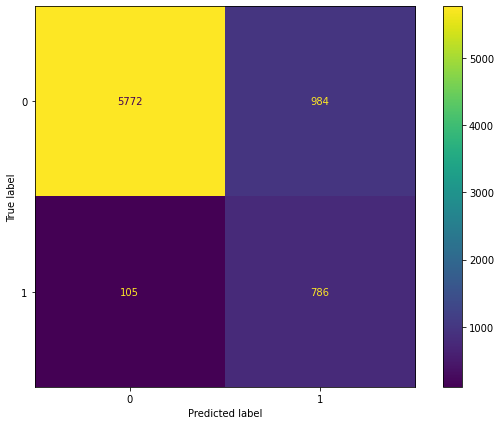

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      6756
           1       0.44      0.88      0.59       891

    accuracy                           0.86      7647
   macro avg       0.71      0.87      0.75      7647
weighted avg       0.92      0.86      0.88      7647



In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)

lr_parameters = {
    'C' : (0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10),
    'solver': ('lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga')
}

train(lr, lr_parameters, x_under, y_under, x_test, y_test)

Best Hyperparameter for Logistic Regression is C: 0.1, solver: newton-cg. 

The model created using Logistic Regression is not good, because it can only capture 88% of customer has subscribed a term deposit

### Decision Tree

              params  mean_test_score
1   {'max_depth': 2}         0.953061
3   {'max_depth': 4}         0.940288
5   {'max_depth': 6}         0.918306
4   {'max_depth': 5}         0.902854
6   {'max_depth': 7}         0.894534
7   {'max_depth': 8}         0.892759
8   {'max_depth': 9}         0.891859
9  {'max_depth': 10}         0.878494
2   {'max_depth': 3}         0.847901
0   {'max_depth': 1}         0.830956


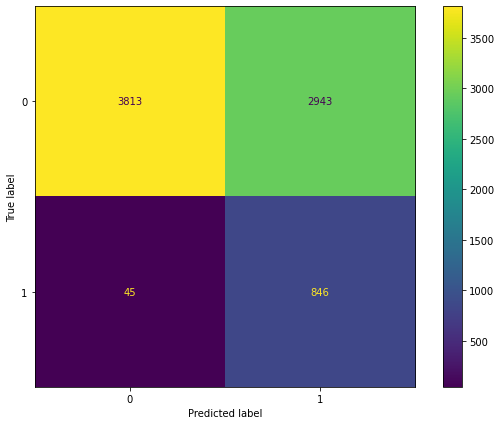

              precision    recall  f1-score   support

           0       0.99      0.56      0.72      6756
           1       0.22      0.95      0.36       891

    accuracy                           0.61      7647
   macro avg       0.61      0.76      0.54      7647
weighted avg       0.90      0.61      0.68      7647



In [ ]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(random_state=42)

dt_parameters = {
    'max_depth':(1,2,3,4,5, 6, 7, 8, 9, 10)
}

train(dt, dt_parameters, x_under, y_under, x_test, y_test)

Best Hyperparameter for Decision Tree is max_depth = 4. 

The model created using Decision Tree is very good, because it can only capture 94% of customer has subscribed a term deposit

### Random forest

                                   params  mean_test_score
89  {'max_depth': 10, 'n_estimators': 70}         0.929588
88  {'max_depth': 10, 'n_estimators': 60}         0.928103
78   {'max_depth': 9, 'n_estimators': 50}         0.927805
80   {'max_depth': 9, 'n_estimators': 70}         0.927507
79   {'max_depth': 9, 'n_estimators': 60}         0.927507
..                                    ...              ...
4    {'max_depth': 1, 'n_estimators': 30}         0.504156
5    {'max_depth': 1, 'n_estimators': 40}         0.498807
3    {'max_depth': 1, 'n_estimators': 20}         0.440869
2    {'max_depth': 1, 'n_estimators': 10}         0.423933
1     {'max_depth': 1, 'n_estimators': 5}         0.381453

[90 rows x 2 columns]


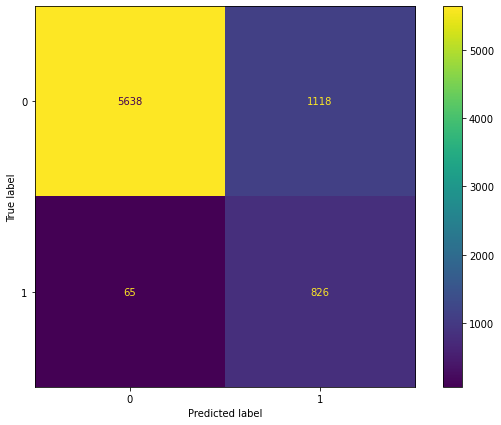

              precision    recall  f1-score   support

           0       0.99      0.83      0.91      6756
           1       0.42      0.93      0.58       891

    accuracy                           0.85      7647
   macro avg       0.71      0.88      0.74      7647
weighted avg       0.92      0.85      0.87      7647



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf_parameters = {
    'n_estimators': (2, 5, 10,20,30,40,50, 60, 70),
    'max_depth':(1,2,3,4,5, 6, 7, 8, 9, 10)
}

train(rf, rf_parameters, x_under, y_under, x_test, y_test)

Best Hyperparameter for Random Forest is max_depth = 10, n_estimators = 70

The model created using Random Forest is very good, because it can only capture 93% of customer has subscribed a term deposit

## Modelling (Oversampling SMOTE)

In [ ]:
from imblearn import over_sampling

x_over, y_over = over_sampling.SMOTE().fit_resample(x_train, y_train)

In [ ]:
y_over.value_counts()

0    27219
1    27219
Name: y, dtype: int64

### K-Nearest Neighbor

                                       params  mean_test_score
5   {'n_neighbors': 4, 'weights': 'distance'}         0.988464
9   {'n_neighbors': 6, 'weights': 'distance'}         0.987288
7   {'n_neighbors': 5, 'weights': 'distance'}         0.987068
3   {'n_neighbors': 3, 'weights': 'distance'}         0.986921
11  {'n_neighbors': 7, 'weights': 'distance'}         0.986480
13  {'n_neighbors': 8, 'weights': 'distance'}         0.985892
2    {'n_neighbors': 3, 'weights': 'uniform'}         0.985304
1   {'n_neighbors': 2, 'weights': 'distance'}         0.983504
6    {'n_neighbors': 5, 'weights': 'uniform'}         0.983137
10   {'n_neighbors': 7, 'weights': 'uniform'}         0.980932
8    {'n_neighbors': 6, 'weights': 'uniform'}         0.973254
4    {'n_neighbors': 4, 'weights': 'uniform'}         0.973034
12   {'n_neighbors': 8, 'weights': 'uniform'}         0.971711
0    {'n_neighbors': 2, 'weights': 'uniform'}         0.958558


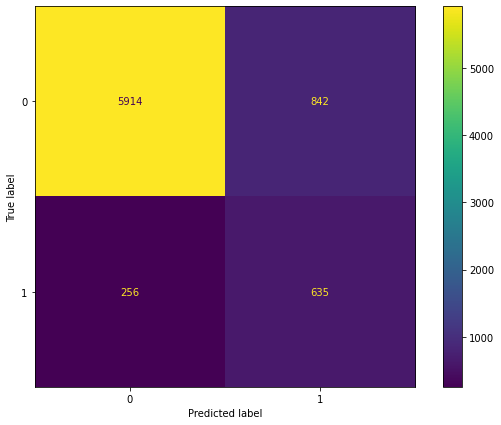

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      6756
           1       0.43      0.71      0.54       891

    accuracy                           0.86      7647
   macro avg       0.69      0.79      0.73      7647
weighted avg       0.90      0.86      0.87      7647



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn_parameters = {
    'n_neighbors': (2,3,4,5,6,7,8),
    'weights':('uniform','distance')
}

train(knn, knn_parameters, x_over, y_over, x_test, y_test)

Best Hyperparameter for K-NN is n = 4, weight = distance. 

The model created using KNN is good, because it can only capture 71% of customer has subscribed a term deposit

### Logistic Regression

/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/optimize.py:210: 

                                        params  mean_test_score
14         {'C': 0.001, 'solver': 'newton-cg'}         0.909072
20          {'C': 0.01, 'solver': 'newton-cg'}         0.903930
19          {'C': 0.01, 'solver': 'liblinear'}         0.901579
13         {'C': 0.001, 'solver': 'liblinear'}         0.897573
25           {'C': 0.1, 'solver': 'liblinear'}         0.882072
26           {'C': 0.1, 'solver': 'newton-cg'}         0.881594
31             {'C': 1, 'solver': 'liblinear'}         0.876451
32             {'C': 1, 'solver': 'newton-cg'}         0.875606
38            {'C': 10, 'solver': 'newton-cg'}         0.875128
37            {'C': 10, 'solver': 'liblinear'}         0.875018
18              {'C': 0.01, 'solver': 'lbfgs'}         0.856020
24               {'C': 0.1, 'solver': 'lbfgs'}         0.854734
8         {'C': 0.0001, 'solver': 'newton-cg'}         0.853265
30                 {'C': 1, 'solver': 'lbfgs'}         0.852787
36                {'C': 10, 'solver': 'l

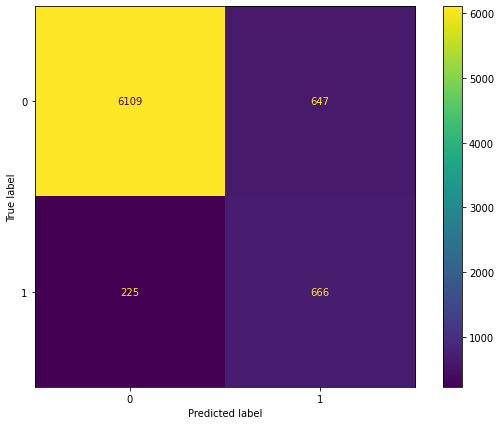

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      6756
           1       0.51      0.75      0.60       891

    accuracy                           0.89      7647
   macro avg       0.74      0.83      0.77      7647
weighted avg       0.91      0.89      0.90      7647



In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)

lr_parameters = {
    'C' : (0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10),
    'solver': ('lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga')
}

train(lr, lr_parameters, x_over, y_over, x_test, y_test)

Best Hyperparameter for Logistic Regression is C: 0.001, solver: newton-cg. 

The model created using Logistic Regression is good, because it can capture 75% of customer has subscribed a term deposit

### Decision Tree

              params  mean_test_score
2   {'max_depth': 3}         0.938499
5   {'max_depth': 6}         0.920608
7   {'max_depth': 8}         0.918294
9  {'max_depth': 10}         0.916751
8   {'max_depth': 9}         0.915649
6   {'max_depth': 7}         0.914216
4   {'max_depth': 5}         0.910578
1   {'max_depth': 2}         0.882472
3   {'max_depth': 4}         0.859143
0   {'max_depth': 1}         0.814027


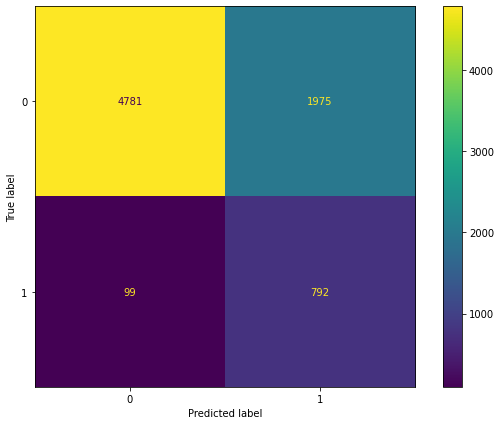

              precision    recall  f1-score   support

           0       0.98      0.71      0.82      6756
           1       0.29      0.89      0.43       891

    accuracy                           0.73      7647
   macro avg       0.63      0.80      0.63      7647
weighted avg       0.90      0.73      0.78      7647



In [ ]:
from sklearn import tree

dt = tree.DecisionTreeClassifier(random_state=42)

dt_parameters = {
    'max_depth':(1,2,3,4,5, 6, 7, 8, 9, 10)
}

train(dt, dt_parameters, x_over, y_over, x_test, y_test)

Best Hyperparameter for Decision Tree is max_depth = 3. 

The model created using Decision Tree is good, because it can only capture 89% of customer has subscribed a term deposit

### Random forest

                                   params  mean_test_score
80   {'max_depth': 9, 'n_estimators': 70}         0.930639
79   {'max_depth': 9, 'n_estimators': 60}         0.930308
86  {'max_depth': 10, 'n_estimators': 40}         0.929830
76   {'max_depth': 9, 'n_estimators': 30}         0.929757
88  {'max_depth': 10, 'n_estimators': 60}         0.929463
..                                    ...              ...
6    {'max_depth': 1, 'n_estimators': 50}         0.548219
5    {'max_depth': 1, 'n_estimators': 40}         0.542194
4    {'max_depth': 1, 'n_estimators': 30}         0.528013
9     {'max_depth': 2, 'n_estimators': 2}         0.356256
1     {'max_depth': 1, 'n_estimators': 5}         0.255666

[90 rows x 2 columns]


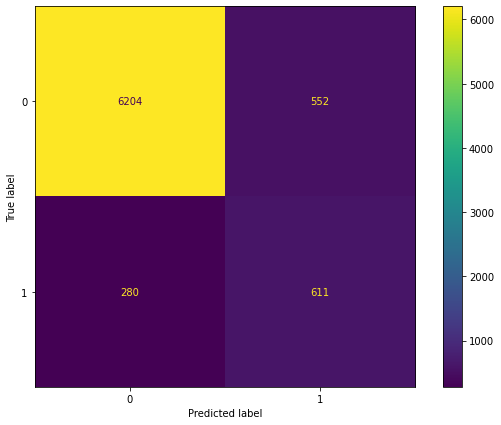

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      6756
           1       0.53      0.69      0.59       891

    accuracy                           0.89      7647
   macro avg       0.74      0.80      0.77      7647
weighted avg       0.91      0.89      0.90      7647



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf_parameters = {
    'n_estimators': (2, 5, 10,20,30,40,50, 60, 70),
    'max_depth':(1,2,3,4,5, 6, 7, 8, 9, 10)
}

train(rf, rf_parameters, x_over, y_over, x_test, y_test)

Best Hyperparameter for Random Forest is max_depth = 9, n_estimators = 70

The model created using Random Forest is good, because it can capture 69% of customer has subscribed a term deposit

## Best Model
Decision Tree + Undersampling trein set
- Recall: 94%
- Precision: 38%

In [ ]:
x_under.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6732 entries, 0 to 6731
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   6732 non-null   int64  
 1   education             6732 non-null   int64  
 2   default               6732 non-null   int64  
 3   housing               6732 non-null   int64  
 4   loan                  6732 non-null   int64  
 5   duration              6732 non-null   int64  
 6   campaign              6732 non-null   int64  
 7   pdays                 6732 non-null   int64  
 8   previous              6732 non-null   int64  
 9   cons.price.idx        6732 non-null   float64
 10  cons.conf.idx         6732 non-null   float64
 11  nr.employed           6732 non-null   float64
 12  job_admin.            6732 non-null   uint8  
 13  job_blue-collar       6732 non-null   uint8  
 14  job_entrepreneur      6732 non-null   uint8  
 15  job_housemaid        

### Tree

[Text(0.5, 0.9, 'X[5] <= 207.5\ngini = 0.5\nsamples = 6732\nvalue = [3366, 3366]'),
 Text(0.25, 0.7, 'X[11] <= 5087.65\ngini = 0.328\nsamples = 2653\nvalue = [2104, 549]'),
 Text(0.125, 0.5, 'X[5] <= 120.5\ngini = 0.43\nsamples = 570\nvalue = [178, 392]'),
 Text(0.0625, 0.3, 'X[5] <= 80.0\ngini = 0.484\nsamples = 175\nvalue = [103, 72]'),
 Text(0.03125, 0.1, 'gini = 0.245\nsamples = 56\nvalue = [48, 8]'),
 Text(0.09375, 0.1, 'gini = 0.497\nsamples = 119\nvalue = [55, 64]'),
 Text(0.1875, 0.3, 'X[45] <= 0.5\ngini = 0.308\nsamples = 395\nvalue = [75, 320]'),
 Text(0.15625, 0.1, 'gini = 0.372\nsamples = 271\nvalue = [67, 204]'),
 Text(0.21875, 0.1, 'gini = 0.121\nsamples = 124\nvalue = [8, 116]'),
 Text(0.375, 0.5, 'X[10] <= -46.65\ngini = 0.139\nsamples = 2083\nvalue = [1926, 157]'),
 Text(0.3125, 0.3, 'X[5] <= 92.5\ngini = 0.499\nsamples = 228\nvalue = [118, 110]'),
 Text(0.28125, 0.1, 'gini = 0.17\nsamples = 64\nvalue = [58, 6]'),
 Text(0.34375, 0.1, 'gini = 0.464\nsamples = 164\nvalue

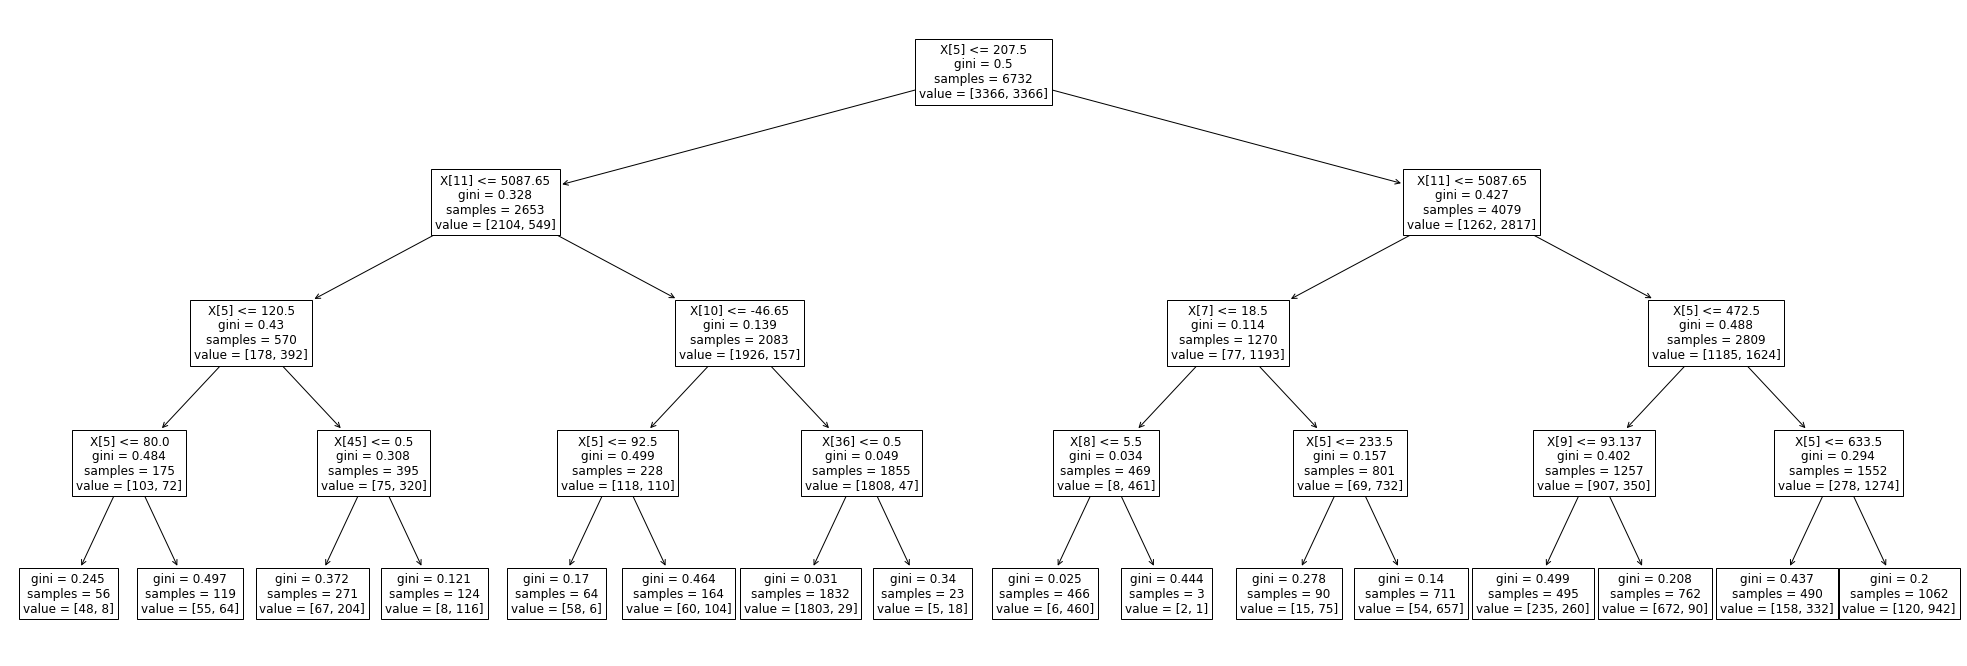

In [15]:
from sklearn import tree

best_model = tree.DecisionTreeClassifier(max_depth = 4)
best_model = best_model.fit(x_under, y_under)
plt.figure(figsize=(35,12))
tree.plot_tree(best_model, fontsize=12)

### Feature Importance

In [17]:
importance = best_model.feature_importances_

feature_imp = pd.DataFrame(columns = ['X', '%'])
for i,v in enumerate(importance):
  feature_imp = feature_imp.append({'X':i, '%':v}, ignore_index=True)

feature_imp = feature_imp.sort_values('%', ascending=False).reset_index()
print(feature_imp)

    index     X         %
0       5   5.0  0.617504
1      11  11.0  0.274409
2       9   9.0  0.048414
3      10  10.0  0.041295
4      36  36.0  0.012999
5      45  45.0  0.002764
6       7   7.0  0.001374
7       8   8.0  0.001240
8      28  28.0  0.000000
9      29  29.0  0.000000
10     30  30.0  0.000000
11     31  31.0  0.000000
12     32  32.0  0.000000
13     33  33.0  0.000000
14     34  34.0  0.000000
15     35  35.0  0.000000
16     39  39.0  0.000000
17     37  37.0  0.000000
18     38  38.0  0.000000
19     26  26.0  0.000000
20     40  40.0  0.000000
21     41  41.0  0.000000
22     42  42.0  0.000000
23     43  43.0  0.000000
24     44  44.0  0.000000
25     27  27.0  0.000000
26      0   0.0  0.000000
27     25  25.0  0.000000
28     15  15.0  0.000000
29      2   2.0  0.000000
30      3   3.0  0.000000
31      4   4.0  0.000000
32      6   6.0  0.000000
33     12  12.0  0.000000
34     13  13.0  0.000000
35     14  14.0  0.000000
36     16  16.0  0.000000
37     24  2

Feature Importance:
1. duration: 61.75%
2. nr.employed: 27.44%
3. cons.price.idx: 4.84%
4. cons.conf.idx: 4.13%
5. month_oct: 1.30%
6. poutcome: 0.28%
7. pday: 0.14%
8. previous: 0.12%

## Conclution

Based on the 4 models made and 3 set of data train, the best model is Decision Tree + undersampling data train with a recall value of 94% and precision value of 38%. There are 8 predictor variables that form the basis of a prediction: 
1. duration
2. nr.employed
3. cons.price.idx
4. cons.conf.idx
5. month_oct
6. poutcome
7. pday
8. previous


## Recommendation

Recommendations are made based on the feature importance of the model, so there are 6 recommendations:
1. Clients who subscribe on average have a higher duration. For this reason, in the next deposit marketing campaign, you should make communication more interesting so that the contact duration will be longer and the subscribe potential will be higher.
2. Contact clients whose number of workers is below 5088
3. Contact clients who have a consumer price index below 93.137
4. Contact clients who have a consumer confidence index below 46.65
5. Creating a campaign in October
6. Contact subscribed client in the previous campaign
7. Avoid lost contact more than 513 days from last contact
8. Create a campaign contact before the campaign period is implemented

## Impact

1. Capture 94% potential subscribed client
2. Cost 3.48x more efficient